# Colorectal Cancer Risk & Survival Prediction

## Objective
The goal of this project is to predict the **survival status** of colorectal cancer patients based on their demographics, medical history, and lifestyle factors.

## Dataset Overview
The dataset contains records of **colorectal cancer patients**, with features related to risk factors, treatment, and outcomes.

## Instructions
1. **Data Exploration**: Load and examine the dataset.
2. **Data Preprocessing**: Handle missing values, encode categorical variables, and normalize numerical features.
3. **Feature Selection**: Identify important predictors for survival.
4. **Model Training**: Train a classification model to predict survival status.
5. **Evaluation**: Assess model performance using accuracy and classification reports.

In [10]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score




In [14]:
from google.colab import files
uploaded = files.upload()

Saving colorectal_cancer_prediction.csv to colorectal_cancer_prediction.csv


In [15]:

# Load the dataset
df = pd.read_csv(r'colorectal_cancer_prediction.csv')
df.head()




,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,1,71,Male,Other,Europe,Urban,Middle,Yes,No,III,...,Yes,Delayed,Good,Yes,No,No,Good,Survived,No,16
1,2,34,Female,Black,North America,Urban,Middle,No,No,I,...,No,Timely,Good,No,Yes,Yes,Poor,Deceased,No,28
2,3,80,Female,White,North America,Urban,Middle,No,No,III,...,Yes,Timely,Limited,No,Yes,Yes,Good,Survived,No,26
3,4,40,Male,Black,North America,Rural,Low,No,No,I,...,Yes,Delayed,Limited,Yes,No,Yes,Poor,Deceased,No,44
4,5,43,Female,White,Europe,Urban,High,Yes,No,III,...,No,Delayed,Good,Yes,No,Yes,Poor,Deceased,Yes,20


In [16]:
print("Displaying the head of the DataFrame:")
df.head()

print("\nDisplaying information about the DataFrame:")
df.info()

Displaying the head of the DataFrame:

Displaying information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               89945 non-null  int64  
 1   Age                      89945 non-null  int64  
 2   Gender                   89945 non-null  object 
 3   Race                     89945 non-null  object 
 4   Region                   89945 non-null  object 
 5   Urban_or_Rural           89945 non-null  object 
 6   Socioeconomic_Status     89945 non-null  object 
 7   Family_History           89945 non-null  object 
 8   Previous_Cancer_History  89945 non-null  object 
 9   Stage_at_Diagnosis       89945 non-null  object 
 10  Tumor_Aggressiveness     89945 non-null  object 
 11  Colonoscopy_Access       89945 non-null  object 
 12  Screening_Regularity     89945 non-null  object

## Exploratory Data Analysis (EDA)
- Check for missing values
- Visualize key distributions
- Identify correlations between features

Missing values in each column:
Patient_ID                 0
Age                        0
Gender                     0
Race                       0
Region                     0
Urban_or_Rural             0
Socioeconomic_Status       0
Family_History             0
Previous_Cancer_History    0
Stage_at_Diagnosis         0
Tumor_Aggressiveness       0
Colonoscopy_Access         0
Screening_Regularity       0
Diet_Type                  0
BMI                        0
Physical_Activity_Level    0
Smoking_Status             0
Alcohol_Consumption        0
Red_Meat_Consumption       0
Fiber_Consumption          0
Insurance_Coverage         0
Time_to_Diagnosis          0
Treatment_Access           0
Chemotherapy_Received      0
Radiotherapy_Received      0
Surgery_Received           0
Follow_Up_Adherence        0
Survival_Status            0
Recurrence                 0
Time_to_Recurrence         0
dtype: int64


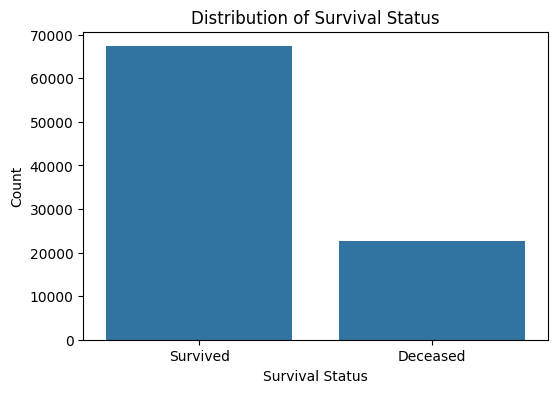

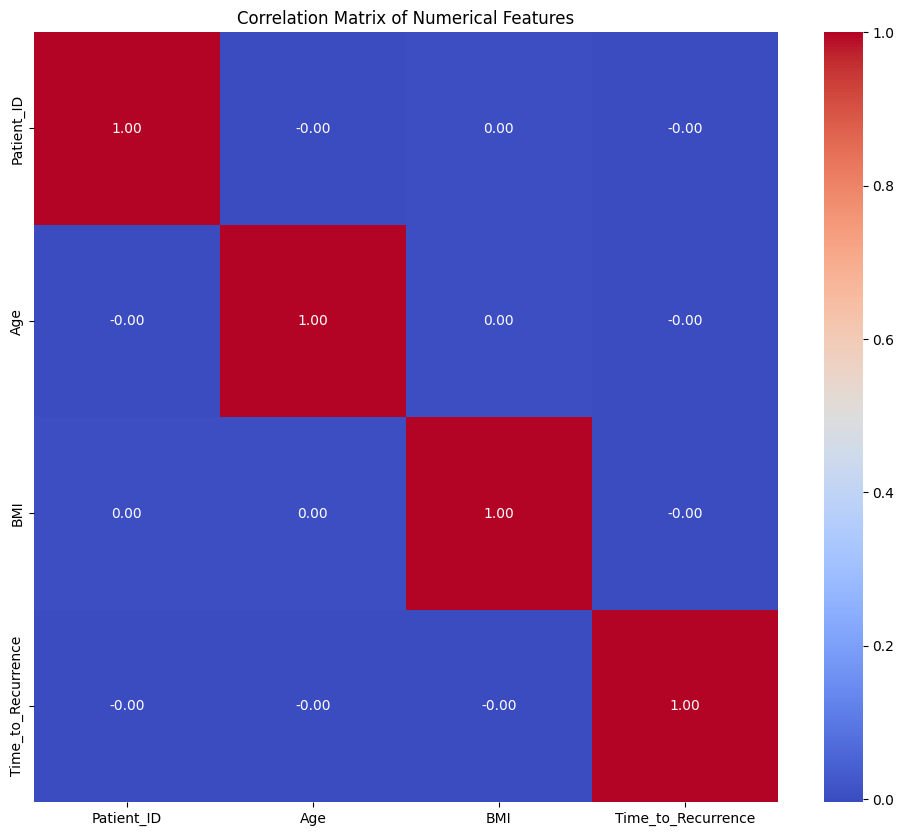

In [17]:
import pandas as pd
# Check for missing values
df = pd.read_csv(r'colorectal_cancer_prediction.csv') # Reload df to ensure it's defined
print("Missing values in each column:")
print(df.isnull().sum())

# Visualize survival status distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Survival_Status', data=df)
plt.title('Distribution of Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()

# Correlation heatmap (numerical features only)
plt.figure(figsize=(12, 10))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data Preprocessing
- Handle missing values
- Encode categorical variables
- Normalize numerical features

In [21]:

# Drop unnecessary columns (e.g., Patient ID if present)
if 'Patient_ID' in df.columns:
    df = df.drop('Patient_ID', axis=1)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop('Survival_Status_Survived', axis=1)
y = df['Survival_Status_Survived']


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training
Train a **Logistic Regression** model to predict patient survival.

In [23]:

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train);

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7514592250819946
Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00      4471
        True       0.75      1.00      0.86     13518

    accuracy                           0.75     17989
   macro avg       0.38      0.50      0.43     17989
weighted avg       0.56      0.75      0.64     17989



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
